Some of the instances of data set : 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  heartdisease  
0  0    6             0  
1  3    3             2  
2  2    7             1  
3  0    3             0  
4  0    3             0  
Attributes and their data types : 

age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca               ob

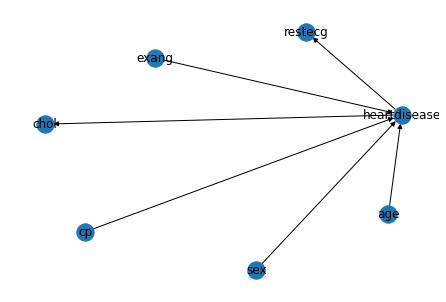

Finding Elimination Order: : 100%|██████████████████████████████████████████████████████| 4/4 [00:00<00:00, 100.26it/s]

kishan
Probability of heartdisease with evidence restecg : 1




Eliminating: sex: 100%|██████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 16.69it/s]


+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1012 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2392 |
+-----------------+---------------------+
| heartdisease(3) |              0.2015 |
+-----------------+---------------------+
| heartdisease(4) |              0.4581 |
+-----------------+---------------------+
Probability of heartdisease with evidence cp : 2


Eliminating: sex: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 51.85it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3610 |
+-----------------+---------------------+
| heartdisease(1) |              0.2159 |
+-----------------+---------------------+
| heartdisease(2) |              0.1373 |
+-----------------+---------------------+
| heartdisease(3) |              0.1537 |
+-----------------+---------------------+
| heartdisease(4) |              0.1321 |
+-----------------+---------------------+


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("lab7_data.csv")
df = df.replace('?', np.nan)

print("Some of the instances of data set : \n")
print(df.head())

print("Attributes and their data types : \n")
print(df.dtypes)

from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator 
from pgmpy.inference import VariableElimination


model = BayesianModel([('age', 'heartdisease'), ('sex', 'heartdisease'), ('exang', 'heartdisease'), 
                       ('cp', 'heartdisease'), ('heartdisease', 'restecg'), ('heartdisease', 'chol')])


import networkx as nx
import matplotlib.pyplot as plt
nx.draw(model, with_labels = True);
plt.show()

model.fit(df, estimator = MaximumLikelihoodEstimator)

infer = VariableElimination(model)

print("kishan")

print("Probability of heartdisease with evidence restecg : 1")
q1 = infer.query(variables = ['heartdisease'], evidence = {'restecg' : 1})
print(q1)

print("Probability of heartdisease with evidence cp : 2")
q2 = infer.query(variables = ['heartdisease'], evidence = {'cp' : 2})
print(q2)